Imports

In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

Load data

In [51]:
df = pd.read_csv('All_primary_hits.csv')
df2 = pd.read_csv('All_primary_hits_and_controls.csv')

Data processing for minimum Mahalanobis distances plot

In [52]:
# Choose numerical features
numerical_features_raw = df.select_dtypes(include=[np.number])

# Exclude specified columns
numerical_features = numerical_features_raw.drop(columns=['Concentration', 'Unnamed: 0'])

# Calculate mean for identical entries in 'tags' column
df_mean_mahala = numerical_features.groupby(df['tags']).mean().reset_index()


Select data to plot compounds with lowest Mahalanobis distance from control

In [53]:
# Select the 10 entries with the lowest mahalanobis_from_pos values
selected_tags = df_mean_mahala.nsmallest(10, 'mahalanobis_from_pos')['tags']

# Select all rows in df which contain one of the selected tags
selected_rows = df[df['tags'].isin(selected_tags)]

# Sort the selected rows by mahalanobis_from_pos in descending order
selected_rows_sorted = selected_rows.sort_values(by='mahalanobis_from_pos', ascending=True)

Plot compounds with lowest Mahalanobis distance from control

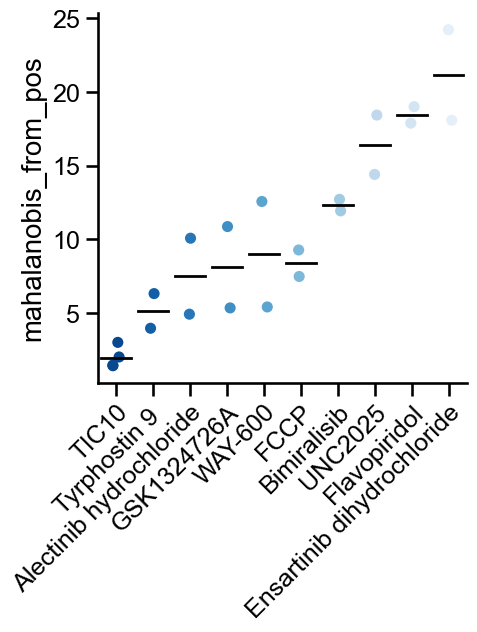

In [54]:
# Set the style and font
plt.rcParams['font.family'] = 'Arial'
sns.set_context("talk", font_scale=1.1)

# Create the stripplot
ax = sns.stripplot(x="tags", y="mahalanobis_from_pos", data=selected_rows_sorted, size=8, palette='Blues_r')

# Plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tags",
            y="mahalanobis_from_pos",
            data=selected_rows_sorted,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')
ax.set_box_aspect(1)
ax.set_xlabel(None)
sns.despine()

plt.savefig('Top10_hits' + '.pdf', bbox_inches='tight')
plt.show()

Data processing for compound clustering plot

In [55]:
# Change tag names
# Replace values in 'tags' column
df2['tags'] = df2['tags'].replace({'Mut;DMSO': 'Triplication + DMSO', 
                                   'WT;DMSO': 'Isogenic control + DMSO', 
                                   'Mut;PRO': 'Triplication + Prostratin'}, regex=True)

# Remove the substring "Mut;" from all rows in the 'tags' column
df2['tags'] = df2['tags'].str.replace('Mut;', '')

# Choose numerical features
numerical_features_raw = df2.select_dtypes(include=[np.number])

# Exclude specified columns
numerical_features = numerical_features_raw.drop(columns=['mahalanobis_from_pos', 'mahalanobis_from_neg','Concentration', 'Unnamed: 0'])

# Scale the numerical features using RobustScaler
scaler = RobustScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns, index=numerical_features.index)

# Add tags column back to scaled data
df2_scaled = df2_scaled.join(df2['tags'])

# Calculate mean for identical entries in 'tags' column
df_mean = df2_scaled.groupby(df2['tags']).mean()

# Features to use
features = [
    "Cell_Correlation_MAP2_SNCA",
    "Cell_Correlation_TH_SNCA",
    "Cell_Correlation_VanSteelselsMeanX_TH_SNCA",
    "Cell_Correlation_VanSteelselsMeanY_TH_SNCA",
    "Cell_Correlation_VanSteelselsSigmaX_TH_SNCA",
    "Cell_Intensity_MeanIntensity_MAP2",
    "Cell_Intensity_MeanIntensity_SNCA",
    "Cell_Intensity_SumIntensityPerNuclei_SNCA",
    "Cell_Neurites_BranchingPointsPerNuclei_MAP2",
    "Cell_Neurites_BranchingPointsPerNuclei_TH",
    "Cell_Neurites_LengthPerNuclei_MAP2",
    "Cell_Neurites_LengthPerNuclei_TH",
    "Cell_Surface_RatioSurface_TH_SNCA",
    "Cell_SurfacePerNuclei_MAP2",
    "Cell_SurfacePerNuclei_SNCA",
    "Cell_SurfacePerNuclei_TH",
    "Cell_SurfacePerNuclei_TH_SNCA",
    "Cell_Texture_SNCA_AngularSecondMoment_000",
    "Cell_TH_SNCA_Intensity_SumIntensityPerNuclei_SNCA",
    "Cytoplasm_Intensity_MeanIntensity_SNCA",
    "Cytoplasm_SurfacePerNuclei_SNCA",
    "IndividualCell_Intensity_MeanIntensity_SNCA",
    "IndividualCell_Intensity_RadialProfile_InterceptFit_SNCA",
    "IndividualCell_Intensity_RadialProfile_MaxSlope_SNCA",
    "IndividualCell_Intensity_RadialProfile_Mean_SNCA",
    "IndividualCell_Intensity_RadialProfile_Median_SNCA",
    "IndividualCell_Intensity_RadialProfile_Minimum_SNCA",
    "IndividualCell_Intensity_RadialProfile_SlopeFit_SNCA",
    "IndividualCell_Intensity_SumIntensity_SNCA",
    "IndividualCell_Surface_MeanSurface_SNCA",
    "Membrane_Intensity_MeanIntensity_SNCA",
    "Membrane_Intensity_MeanIntensity_TH",
    "Membrane_Surface_SurfacePerNuclei_MAP2",
    "Membrane_Surface_SurfacePerNuclei_SNCA",
    "Nuclei_Living_Ratio_MAP2",
    "Nuclei_Living_Ratio_MAP2_SNCA",
    "Nuclei_Living_Ratio_SNCA",
    "Nuclei_Living_Ratio_TH_SNCA",
    "Nuclei_Ratio_Living",
    "Nuclei_Surface_MeanArea"
]

# Use only features used during classification
df_mean_selected = df_mean[features]

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_10136\3113413212.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df2_scaled.groupby(df2['tags']).mean()


Plotting of clustered compound and control profiles

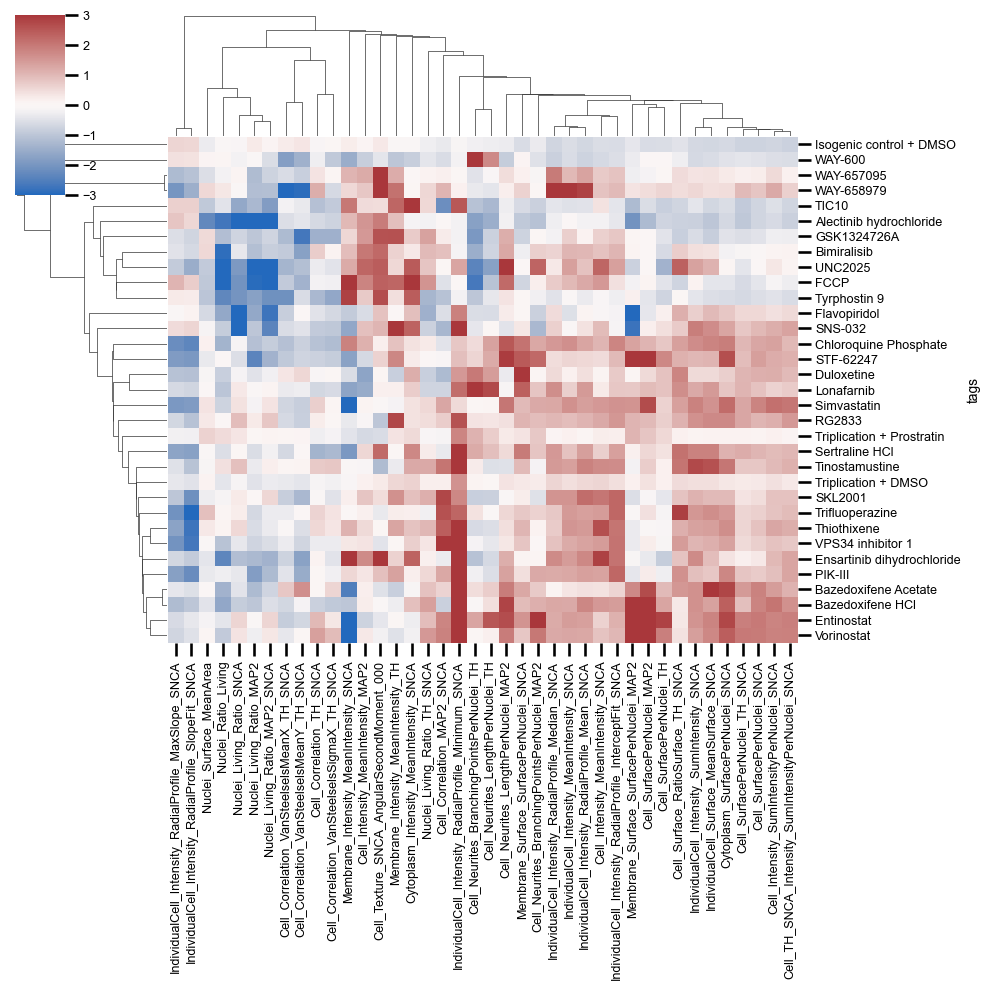

In [65]:
# Set the style and font
plt.rcParams['font.family'] = 'Arial'
sns.set_context("talk", font_scale=0.55)

# Plot the clustermap with cosine distance, y-axis clustering, and specified color scale
sns.clustermap(df_mean_selected, metric='cosine', method='single', col_cluster=True, cmap='vlag', vmin=-3, vmax=3)

plt.savefig('Hit_clustering' + '.pdf', bbox_inches='tight')
plt.show()